# Numerical Exercise 11

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects


2024-06-20 20:01:08.693826: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set?
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>

## Resolution
Given the results of the previous exercise, I have chosen to use the following parameters:
- $N_{\text{train}} = 1000$
- $N_{\text{epochs}} = 30$
- $\sigma = 0.5$

The proposed model is 3 layers deep, with 40 neurons in the first layer, 20 in the second and 1 in the last one. The activation functions tested are: `relu`, `elu`, `sigmoid`, `softmax`, `softplus`, `softsign`, `tanh`, `exponential`.
The last layer has a linear activation function. I have tested different optimizers: stocastic gradient descent, adagrad and adam. Adam seems the best optimizer for this problem.

In [2]:
N_epochs = 30
N_train = 1000
N_valid = 50
sigma = 0.5

# f(x) = a*x^3 + b*x^2 + c*x + d
def f(x, a = 3, b = -2, c = -3, d = 4):
    return a*x**3 + b*x**2 + c*x + d

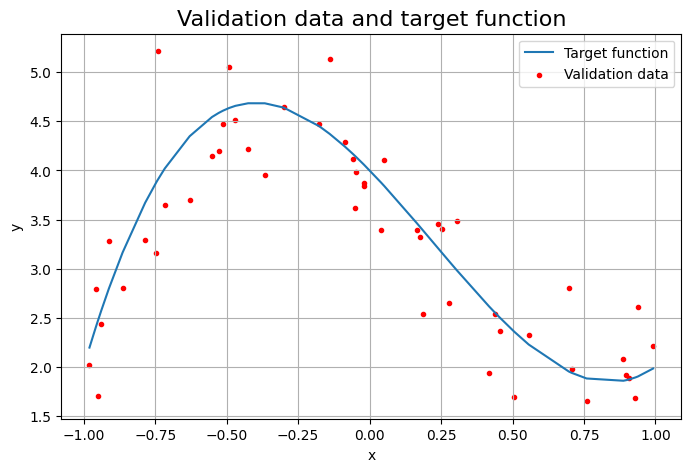

In [3]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, N_valid)
x_valid.sort()

y_target = f(x = x_valid)

y_train = np.random.normal(f(x_train), sigma)
y_valid = np.random.normal(f(x_valid), sigma)

plt.figure(figsize = (8,5))
plt.plot(x_valid, y_target, label = "Target function")
plt.scatter(x_valid, y_valid, marker = ".", color='r', label='Validation data')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Validation data and target function", fontsize = 16)
plt.grid()
plt.legend()
plt.show()

In [4]:
models = []
history = []
act = ['relu', 'elu', 'sigmoid', 'softmax', 'softplus', 'softsign', 'tanh', 'exponential']
for i in range(len(act)):
    model = tf.keras.Sequential()
    model.add(Dense(40, input_shape = (1,), activation = act[i]))
    model.add(Dense(20, activation = act[i]))
    model.add(Dense(1, activation = 'linear'))
    # available optimizers: 'sgd', 'rmsprop', 'adagrad', 'adadelta', 'adam', 'adamax', 'nadam'
    # adam performs the best for this problem, adamw adn nadam curiousely do not perform well
    model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])
    models.append(model)

    history.append(models[i].fit(x = x_train, y = y_train, batch_size = 32, epochs = N_epochs, shuffle = True,
                    validation_data = (x_valid, y_valid)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-06-20 20:01:10.656761: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-20 20:01:10.699438: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355

Epoch 1/30


I0000 00:00:1718913671.480632      70 service.cc:145] XLA service 0x7f9bd4008920 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1718913671.480672      70 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 with Max-Q Design, Compute Capability 7.5
2024-06-20 20:01:11.513946: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-20 20:01:11.595420: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906


 1/32 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - loss: 11.8617 - mse: 11.8617

I0000 00:00:1718913672.061811      70 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 11.2461 - mse: 11.2521 - val_loss: 6.7879 - val_mse: 7.5376
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8075 - mse: 7.8125 - val_loss: 3.5576 - val_mse: 4.0027
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.7468 - mse: 3.7490 - val_loss: 1.7058 - val_mse: 1.9812
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8897 - mse: 1.8897 - val_loss: 1.4686 - val_mse: 1.7100
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3868 - mse: 1.3879 - val_loss: 1.1745 - val_mse: 1.3641
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2241 - mse: 1.2246 - val_loss: 0.9901 - val_mse: 1.1631
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9839 - mse: 0.9845 - val_loss: 0.8496 - val_mse: 1.0022
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9023 - mse: 0.9014 - val_loss: 0.7497 - val_mse: 0.8926
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7897 - mse: 0.7902 -

In [5]:
for i in range(len(act)):
    print("Model with activation function: {c} , {act}".format(c=i, act=act[i]))
    w = models[i].get_weights()

    score = models[i].evaluate(x_valid, y_valid, batch_size = 32, verbose = 0)
    print('Test loss:\t\t', score[0])
    print('Test accuracy:\t\t', score[1])

    score = models[i].evaluate(x_valid, y_target, batch_size = 32, verbose = 0)
    print('Test loss exact:\t', score[0])
    print('Test accuracy exact:\t', score[1])


Model with activation function: 0 , relu
Test loss:		 0.22217363119125366
Test accuracy:		 0.2299181967973709
Test loss exact:	 0.032157979905605316
Test accuracy exact:	 0.03789845108985901
Model with activation function: 1 , elu
Test loss:		 0.4081549048423767
Test accuracy:		 0.4124251902103424
Test loss exact:	 0.17347534000873566
Test accuracy exact:	 0.17939600348472595
Model with activation function: 2 , sigmoid
Test loss:		 0.6686599254608154
Test accuracy:		 0.7132388353347778
Test loss exact:	 0.558489203453064
Test accuracy exact:	 0.5990920066833496
Model with activation function: 3 , softmax
Test loss:		 1.9593666791915894
Test accuracy:		 2.3812389373779297
Test loss exact:	 2.0530033111572266
Test accuracy exact:	 2.5400009155273438
Model with activation function: 4 , softplus
Test loss:		 0.7363191246986389
Test accuracy:		 0.8675351738929749
Test loss exact:	 0.567466139793396
Test accuracy exact:	 0.6906195282936096
Model with activation function: 5 , softsign
Test lo

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


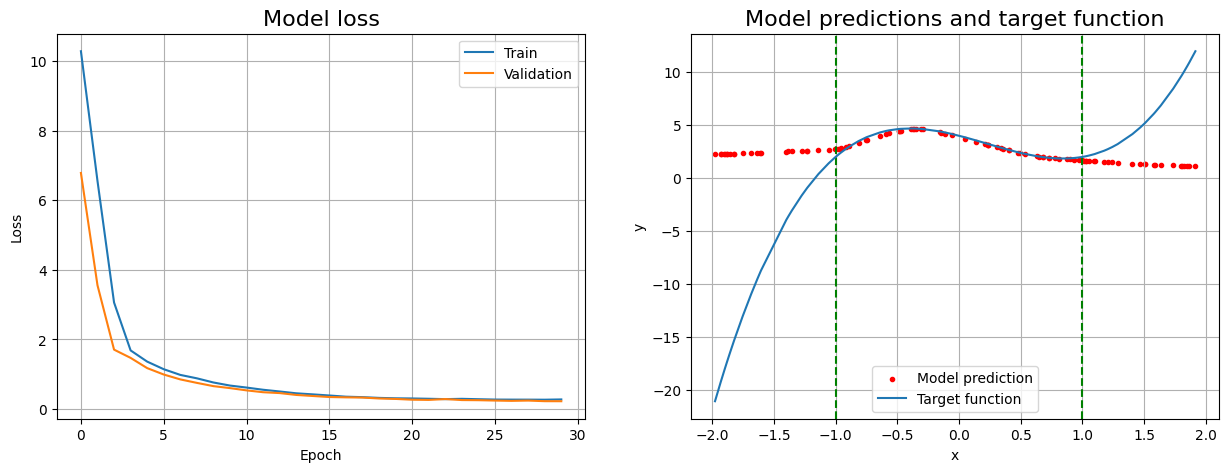

In [6]:
sel = 0

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.plot(history[sel].history['loss'])
plt.plot(history[sel].history['val_loss'])
plt.title('Model loss', fontsize = 16)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'best')
plt.grid()

# generate predictions
x_predicted = np.random.uniform(-2, 2, 100) 
y_predicted = models[sel].predict(x_predicted)

plt.subplot(1,2,2)
plt.scatter(x_predicted, y_predicted, marker = ".", color='r', label = "Model prediction")
x_predicted.sort()
y_target_ext = f(x_predicted)
plt.axvline(1., color = 'g', linestyle = '--')
plt.axvline(-1., color = 'g', linestyle = '--')
plt.plot(x_predicted, y_target_ext, label = "Target function")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model predictions and target function", fontsize = 16)
plt.grid()
plt.legend()
plt.show()

### Some observations
Even the best model, the one with the ReLu activation function, is unable to confidently predict the function outside the range of $x$ where it was trained. This is due to the fact that the function is changing curvature just at the edge of the training range, and the points on the edge are not enough to train the model to predict the function outside the range.
